In [1]:
import pandas as pd 
import glob 
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib as mpl
import numpy as np
from matplotlib.gridspec import GridSpec
import itertools


In [9]:
alascan_stats = pd.read_table('/vol/ek/share/peptide_docking_with_afold2_and_rosettAfold/AlphaFold_review/data_and_code_repository_for_publication/Data/alascan_statistics_tab.tsv', sep='\t')
merged_with_rmsd = pd.read_table('/vol/ek/share/peptide_docking_with_afold2_and_rosettAfold/AlphaFold_review/data_and_code_repository_for_publication/Data/merged_alascan_results_tab.tsv', sep='\t')

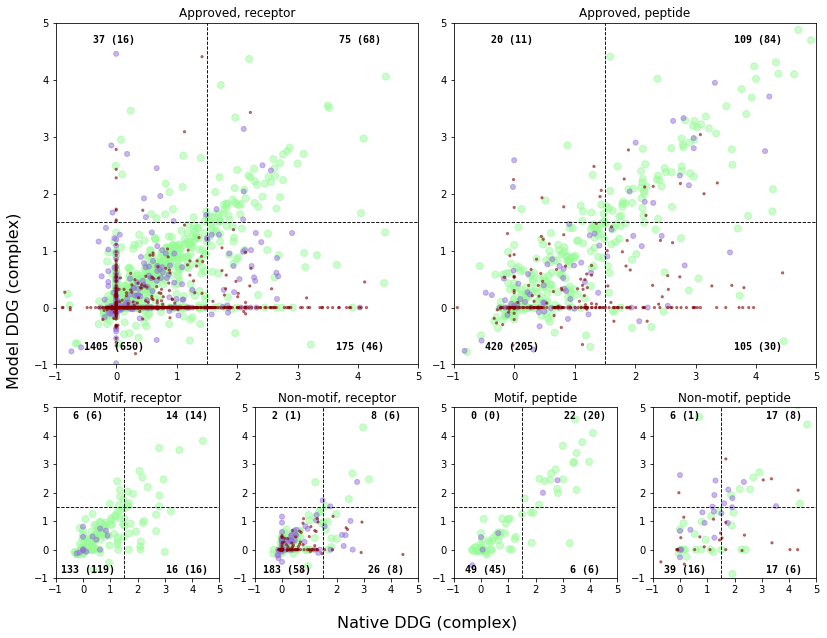

In [10]:
fig = plt.figure(constrained_layout=True, figsize=(11,8.25))
gs1 = fig.add_gridspec(nrows=3, ncols=4)
f_ax1 = fig.add_subplot(gs1[0:2, 0:2])
f_ax2 = fig.add_subplot(gs1[0:2, 2:4], sharey=f_ax1)
f_ax3 = fig.add_subplot(gs1[2, 0])
f_ax4 = fig.add_subplot(gs1[2, 1], sharey=f_ax3)
f_ax5 = fig.add_subplot(gs1[2, 2], sharey=f_ax3)
f_ax6 = fig.add_subplot(gs1[2, 3], sharey=f_ax3)

axs = [
    [f_ax3, f_ax4, f_ax1], 
    [f_ax5, f_ax6, f_ax2]
]

hotspot_threshold = 1.5
all_rms_threshold = 1000 # all values, no filtering
best_rms_threshold = 2.5

text_tab = alascan_stats.query("hotspot_threshold == @hotspot_threshold")


colors = {'x > 5':'maroon', '2.5 < x <= 5':'mediumpurple', 'x <= 2.5':'palegreen'}
size_dict = {'x <= 2.5':50, '2.5 < x <= 5':25, 'x > 5':5}

chain_list = ["A","B"]
partner_list = ["receptor","peptide"]

set_list = ["Motif","Non-motif",'Approved']
bin_list = ['x <= 2.5', '2.5 < x <= 5', 'x > 5']

for i_chain in enumerate(chain_list):
    for k_set in enumerate(set_list):
        filt_tab = merged_with_rmsd
        filt_tab = filt_tab.query('chain == @i_chain[1]').query('dataset == @k_set[1]')
        
        axs[i_chain[0]][k_set[0]].scatter(x=filt_tab['DDG_complex_native'], y=filt_tab['DDG_complex_model'],
            c=filt_tab['floored_combined_rmsBB_if'].map(colors), s=filt_tab['floored_combined_rmsBB_if'].map(size_dict),alpha=0.5)
                        
        
        axs[i_chain[0]][k_set[0]].axhline(y=hotspot_threshold, color='black', linestyle='--', lw=0.9)
        axs[i_chain[0]][k_set[0]].axvline(x=hotspot_threshold, color='black', linestyle='--', lw=0.9)

        axs[i_chain[0]][k_set[0]].set_xlim(-1,5)
        axs[i_chain[0]][k_set[0]].set_ylim(-1,5)

        axs[i_chain[0]][k_set[0]].set_xticks(np.arange(-1,6,1))
        axs[i_chain[0]][k_set[0]].set_yticks(np.arange(-1,6,1))

        axs[i_chain[0]][k_set[0]].set_title(str(k_set[1])+', '+str(partner_list[i_chain[0]]))
        
        
        all_text_tab = text_tab.query('partner_chain == @i_chain[1]').query('dataset == @k_set[1]').query("rms_threshold == @all_rms_threshold")
        best_text_tab = text_tab.query('partner_chain == @i_chain[1]').query('dataset == @k_set[1]').query("rms_threshold == @best_rms_threshold")

        lole = str(all_text_tab.TN.iloc[0])+" ("+str(best_text_tab.TN.iloc[0])+")"
        upri = str(all_text_tab.TP.iloc[0])+" ("+str(best_text_tab.TP.iloc[0])+")"
        uple = str(all_text_tab.FP.iloc[0])+" ("+str(best_text_tab.FP.iloc[0])+")"
        lori = str(all_text_tab.FN.iloc[0])+" ("+str(best_text_tab.FN.iloc[0])+")"
    
        
        if k_set[1] == "Approved":
            x_loc = 0.16
            y_loc = 0.05
            font_size = "medium"
        else:
            x_loc = 0.2
            y_loc = 0.05
            font_size = "medium"
        axs[i_chain[0]][k_set[0]].text(x_loc, y_loc,lole, ha='center', va='center', transform=axs[i_chain[0]][k_set[0]].transAxes, fontweight = 'extra bold', fontsize=font_size, fontfamily="monospace")
        axs[i_chain[0]][k_set[0]].text(1-x_loc, 1-y_loc,upri, ha='center', va='center', transform=axs[i_chain[0]][k_set[0]].transAxes, fontweight = 'extra bold', fontsize=font_size, fontfamily="monospace")
        axs[i_chain[0]][k_set[0]].text(x_loc, 1-y_loc,uple, ha='center', va='center', transform=axs[i_chain[0]][k_set[0]].transAxes, fontweight = 'extra bold', fontsize=font_size, fontfamily="monospace")
        axs[i_chain[0]][k_set[0]].text(1-x_loc, y_loc,lori, ha='center', va='center', transform=axs[i_chain[0]][k_set[0]].transAxes, fontweight = 'extra bold', fontsize=font_size, fontfamily="monospace")

        
fig.text(-0.03, .5, "Model DDG (complex)", rotation = 'vertical', size = 16, va="center")
fig.text(.5, -0.05, "Native DDG (complex)", rotation = 'horizontal', size = 16, ha="center")

plt.show()
